# 1. 서울시 구별 CCTV 현황 분석

    - http://opengov.seoul.go.kr
    - http://stat.seoul.go.kr

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font', family = font_name)
mpl.rcParams['axes.unicode_minus'] = False

### 1) 데이터 수집

In [3]:
# CCTV 자료 불러오기

cctv_seoul=pd.read_csv("data/seoul/cctv.csv")
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [6]:
# 인구수 자료 불러오기
pop_seoul = pd.read_excel('data/seoul/Report.xls', usecols="B,D,G,J,N", header=2)
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


## 2) 전처리

In [7]:
### 컬럼 이름 변경

# cctv 자료에서 기관명이라는 컬럼명을 '구별'로 변경

cctv_seoul.rename(columns={cctv_seoul.columns[0]: '구별'},inplace=True) # inplace=True 원본을 바꿔주는 함수
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [9]:
pop_seoul.rename(columns={pop_seoul.columns[0]: '구별',
                         pop_seoul.columns[1]: '인구수',
                          pop_seoul.columns[2]: '한국인',
                          pop_seoul.columns[3]: '외국인',
                          pop_seoul.columns[4]: '고령자'},inplace=True) # inplace=True 원본을 바꿔주는 함수
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


In [12]:
pop_seoul.columns

Index(['구별', '인구수', '한국인', '외국인', '고령자'], dtype='object')

## 3) 탐색적 데이터 분석

In [16]:
# 어느 구가 가장 CCTV가 많이(적게) 설치되어 있는가

# CCTV 데이터에서 소계를 기준으로 정렬(5개 구 확인)

cctv_seoul.sort_values("소계")



,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109
12,마포구,980,314,118,169,379
1,강동구,1010,379,99,155,377
23,중구,1023,413,190,72,348
17,송파구,1081,529,21,68,463
13,서대문구,1254,844,50,68,292


In [18]:
print(cctv_seoul.sort_values(by="소계", ascending=False).head(5))
print("-------------------------------------------------------------")
print(cctv_seoul.sort_values(by="소계", ascending=True).head(5))

     구별    소계  2013년도 이전  2014년  2015년  2016년
0   강남구  3238       1292    430    584    932
18  양천구  2482       1843    142     30    467
14  서초구  2297       1406    157    336    398
4   관악구  2109        846    260    390    613
21  은평구  2108       1138    224    278    468
-------------------------------------------------------------
     구별   소계  2013년도 이전  2014년  2015년  2016년
9   도봉구  825        238    159     42    386
2   강북구  831        369    120    138    204
5   광진구  878        573     78     53    174
3   강서구  911        388    258    184     81
24  중랑구  916        509    121    177    109


In [21]:
# CCTV 설치 증가율을 알아보자
# CCTV 설치 연도별 증가율을 구해서 "최근 증가율" 컬럼을 새로 추가
# ((2014 + 2015+2016)/2013년도 이전) * 100
# 특히 2014년부터 2016년까지 최근 3년간 CCTV 수를 더하고 2013년 이전 CCTV 수로 나눠서 
#최근 3년간 CCTV 증가율을 계산하겠다.

cctv_seoul['최근증가율'] = (cctv_seoul['2016년'] + cctv_seoul['2015년'] +
                      cctv_seoul['2014년']) / cctv_seoul['2013년도 이전'] * 100
cctv_seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [23]:
###  pop의 첫째 행 삭제 : del, drop

pop_seoul.drop([0], inplace=True)

pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470


In [24]:
# 구별 데이터의 중복이나 결측치 등을 확인
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [25]:
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,0,0,0,0


In [27]:
pop_seoul.drop([26],inplace=True)

In [28]:
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [31]:
# 어느 구가 인구수가 가장 많은가?
print(pop_seoul.sort_values(by="인구수", ascending=False).head(5))
print("-------------------------------------------------------------")
print(pop_seoul.sort_values(by="인구수", ascending=True).head(5))
print("-------------------------------------------------------------")
print(pop_seoul.sort_values(by="외국인", ascending=False).head(5))
print("-------------------------------------------------------------")
print(pop_seoul.sort_values(by="외국인", ascending=True).head(5))
print("-------------------------------------------------------------")
print(pop_seoul.sort_values(by="고령자", ascending=False).head(5))
print("-------------------------------------------------------------")
print(pop_seoul.sort_values(by="고령자", ascending=True).head(5))

     구별     인구수     한국인    외국인    고령자
24  송파구  671994  665282   6712  77978
16  강서구  608361  601696   6665  77381
23  강남구  557865  552976   4889  65859
11  노원구  555803  551902   3901  75081
21  관악구  522292  504445  17847  70807
-------------------------------------------------------------
     구별     인구수     한국인    외국인    고령자
2    중구  135139  126082   9057  21655
1   종로구  164348  154549   9799  26429
3   용산구  245411  229909  15502  37238
18  금천구  253344  234238  19106  34640
4   성동구  314551  306532   8019  41752
-------------------------------------------------------------
      구별     인구수     한국인    외국인    고령자
19  영등포구  403988  369128  34860  54704
17   구로구  440396  408369  32027  59838
18   금천구  253344  234238  19106  34640
21   관악구  522292  504445  17847  70807
6   동대문구  364962  349308  15654  56284
-------------------------------------------------------------
     구별     인구수     한국인   외국인    고령자
10  도봉구  345041  342861  2180  54293
9   강북구  327511  323862  3649  57002
15  양천구  4730

In [32]:
# 외국인 비율, 고령자 비율 컬럼을 추가해서 순위를 확인
pop_seoul['외국인비율']=pop_seoul['외국인']/pop_seoul['인구수']*100
pop_seoul['고령자비율']=pop_seoul['고령자']/pop_seoul['인구수']*100

In [34]:

print(pop_seoul.sort_values(by='외국인비율', ascending=False).head(5))
print("---------------------------------------------------------------")
print(pop_seoul.sort_values(by='고령자비율', ascending=False).head(5))

      구별     인구수     한국인    외국인    고령자     외국인비율      고령자비율
19  영등포구  403988  369128  34860  54704  8.628969  13.540996
18   금천구  253344  234238  19106  34640  7.541525  13.673109
17   구로구  440396  408369  32027  59838  7.272319  13.587317
2     중구  135139  126082   9057  21655  6.701988  16.024242
3    용산구  245411  229909  15502  37238  6.316750  15.173729
---------------------------------------------------------------
      구별     인구수     한국인    외국인    고령자     외국인비율      고령자비율
9    강북구  327511  323862   3649  57002  1.114161  17.404606
1    종로구  164348  154549   9799  26429  5.962348  16.081121
2     중구  135139  126082   9057  21655  6.701988  16.024242
10   도봉구  345041  342861   2180  54293  0.631809  15.735231
6   동대문구  364962  349308  15654  56284  4.289214  15.421880


In [37]:
### CCTV 데이터와 인구 현황 데이터를 합치고 분석하기

 

data_result = pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,379,99,155,377,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,369,120,138,204,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,388,258,184,81,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,846,260,390,613,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [38]:
# 필요없는 컬럼 정리(제거) : 
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [39]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [40]:
# 상관계수 : -1 ~ 1
# 0.3 이하 약한 상관 관계
# 0.7 이하 뚜럿한 상관 관계

np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.26783452],
       [-0.26783452,  1.        ]])

In [41]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.04656978],
       [-0.04656978,  1.        ]])

In [42]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.23037183],
       [0.23037183, 1.        ]])

In [43]:

data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
양천구,2482,34.671731,473087,469221,3866,56070,0.817186,11.851943
서초구,2297,63.371266,445164,440954,4210,54055,0.945719,12.142716
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976
은평구,2108,85.237258,490253,485902,4351,75535,0.887501,15.407351


In [47]:
# CCTV 비율 컬럼 추가(소계 / 인구수 *100)

data_result["CCTV비율"]= data_result["소계"] / data_result["인구수"] *100
data_result.head()


data_result.sort_values(by="CCTV비율",ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164348,154549,9799,26429,5.962348,16.081121,0.985105
용산구,2096,53.216374,245411,229909,15502,37238,6.316750,15.173729,0.854077
중구,1023,147.699758,135139,126082,9057,21655,6.701988,16.024242,0.756998
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427
금천구,1348,100.000000,253344,234238,19106,34640,7.541525,13.673109,0.532083


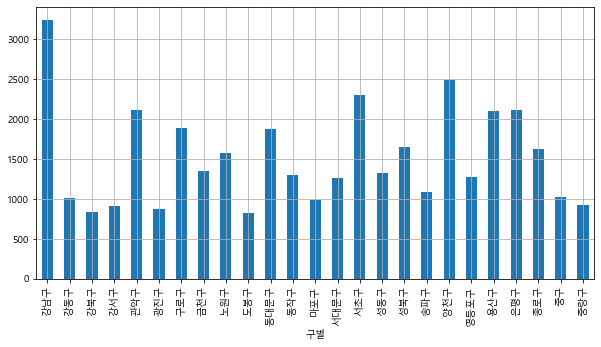

In [52]:
## CCTV가 많이 설치된 구별로 그래프 그리기
data_result["소계"].plot(kind="bar")
data_result["소계"].plot.bar()
data_result["소계"].plot(kind="bar", figsize=(10,5), grid=True)

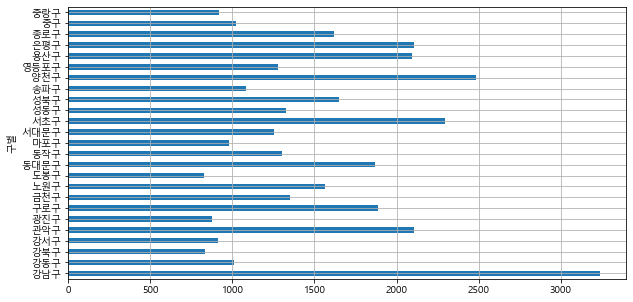

In [53]:
data_result["소계"].plot(kind="barh", figsize=(10,5), grid=True)

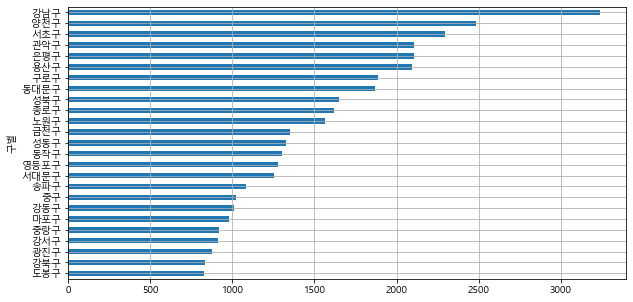

In [54]:
data_result["소계"].sort_values().plot(kind="barh", figsize=(10,5), grid=True)

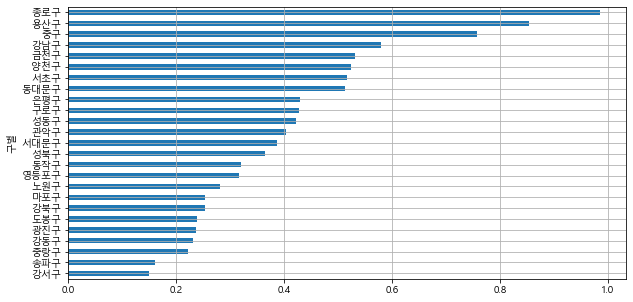

In [55]:
# cctv 비율을 그래프로 확인
data_result["CCTV비율"].sort_values().plot(kind="barh", figsize=(10,5), grid=True)

Text(0, 0.5, '소계')

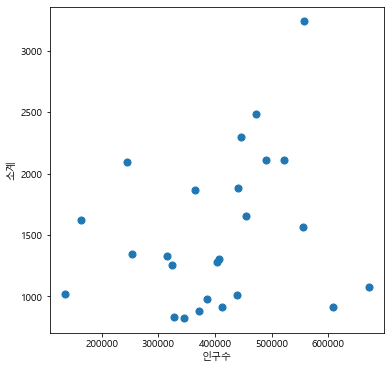

In [56]:
## cctv 설치 대수와 인구 수 관계를 그래프로 확인
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('소계')
#plt.grid()
#plt.show()

In [60]:
#np.poly1d(기울기, 절편)
print(np.poly1d([1,2]))
print("----------------------------")
print(np.poly1d([1,2,3])) #2차방정식

 
1 x + 2
----------------------------
   2
1 x + 2 x + 3


In [61]:
# 회귀선 작성 : polyfit()
fp1= np.polyfit(data_result["인구수"],data_result["소계"],1)
print(fp1)

[1.10432363e-03 1.06864009e+03]


In [64]:
f1 = np.poly1d(fp1)
print(f1)

 
0.001104 x + 1069


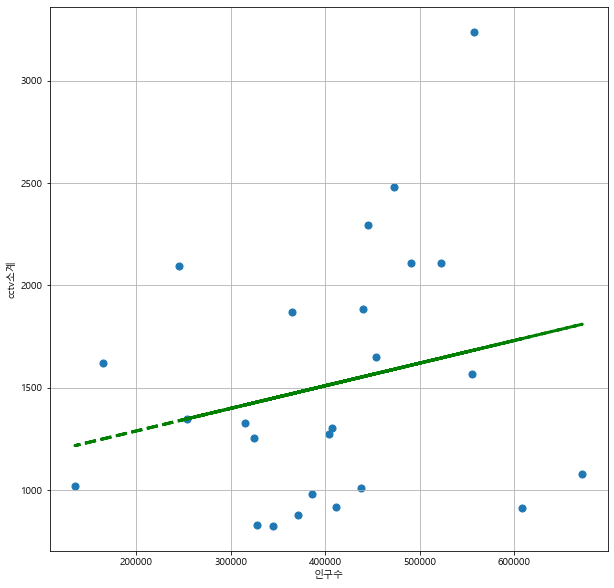

In [68]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(data_result['인구수'],f1(data_result['인구수']), lw=3, color='g', ls="dashed")
#lw = 넓이, ls = 모양
plt.xlabel('인구수')
plt.ylabel('cctv소계')
plt.grid()

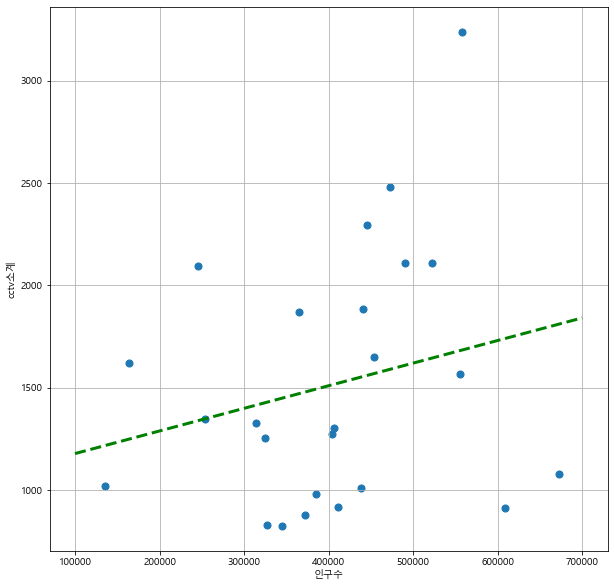

In [70]:
# 데이터를 일정한 간격으로 나눠서 배열로 만들어 주는 함수

fx = np.linspace(100000, 700000, 100)
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
 
plt.plot(fx,f1(fx),lw=3, color='g', ls="dashed")
plt.xlabel('인구수')
plt.ylabel('cctv소계')
plt.grid()


In [71]:
# 각 데이터의 오차를 구한다. 컬럼 추가

data_result['오차'] =np.abs(data_result['소계'] - f1(data_result['인구수']))

 

df_sort = data_result.sort_values(by='오차', ascending=False)

df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427,1553.296412
양천구,2482,34.671731,473087,469221,3866,56070,0.817186,11.851943,0.524639,890.918761
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747,829.467513
용산구,2096,53.216374,245411,229909,15502,37238,6.316750,15.173729,0.854077,756.346747
서초구,2297,63.371266,445164,440954,4210,54055,0.945719,12.142716,0.515990,736.754790


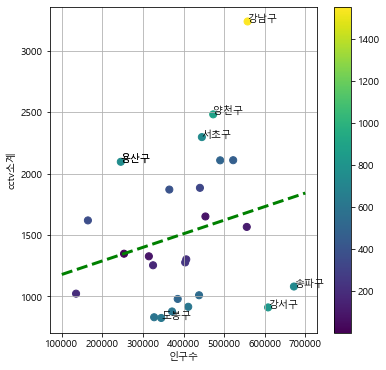

In [85]:
#직선에서 멀어질 수록 다른 색

fx = np.linspace(100000, 700000, 100)
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50, c=data_result["오차"])
 
plt.plot(fx,f1(fx),lw=3, color='g', ls="dashed")
plt.xlabel('인구수')
plt.ylabel('cctv소계')
plt.grid()
plt.colorbar()

plt.text(df_sort['인구수'][3], df_sort['소계'][3], '용산구')

for n in range(7) : 
    plt.text(df_sort['인구수'][n], df_sort['소계'][n], df_sort.index[n])

In [86]:
#최종 결과물 df_sort 파일로 저장하기

df_sort.to_csv("data/seoul/cctv_result_utf.csv", encoding="utf-8")
df_sort.to_csv("data/seoul/cctv_result_euc.csv", encoding="euc-kr")